In [2]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.6 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=e6f90ffbbd544028bdeab6877782faa8fccb137e2563a0b20a659e6aa0b29c7f
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [3]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 5.1 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=f934a0ca83daa703df61219e93d5d41cb0317dac34179ea1dad7e52f71726f6e
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji


In [4]:
# Import Library yg dibutuhkan
from textwrap import wrap
import emoji
import joblib
import langdetect
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
plt.style.use("fivethirtyeight")
warnings.filterwarnings("ignore")

# Data Loading

In [5]:
def get_category_dict(category_file):
  category = pd.read_json(category_file, orient="records")
  category = pd.DataFrame(category["items"].values.tolist())

  return {
    cat.id: cat.snippet.get("title")
    for cat in category.itertuples(index=False)
  }

In [6]:
! pip install -q kaggle

In [7]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"novitadwioctaviana","key":"7080360db0ab15c425d01a9bd5846f14"}'}

In [8]:
! mkdir ~/.kaggle

In [9]:
! cp /content/kaggle.json ~/.kaggle/

In [10]:
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                       Diabetes Dataset                                      9KB  2022-10-06 08:55:25          18201        517  1.0              
akshaydattatraykhare/data-for-admission-in-the-university   Data for Admission in the University                  4KB  2022-10-27 11:05:45           5171        122  1.0              
thedevastator/jobs-dataset-from-glassdoor                   Salary Prediction                                     3MB  2022-11-16 13:52:31           1505         44  1.0              
meirnizri/covid19-dataset                                   COVID-19 Dataset    

In [12]:
!kaggle datasets download -d syahrulhamdani/indonesias-trending-youtube-video-statistics

 98% 71.0M/72.3M [00:00<00:00, 198MB/s]
100% 72.3M/72.3M [00:00<00:00, 171MB/s]


In [13]:
import zipfile
with zipfile.ZipFile('/content/indonesias-trending-youtube-video-statistics.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/trending')

In [14]:
def get_category_dict(category_file):
  category = pd.read_json(category_file, orient="records")
  category = pd.DataFrame(category["items"].values.tolist())
  return {
    cat.id: cat.snippet.get("title")
    for cat in category.itertuples(index=False)
  }

In [15]:
category_dict = get_category_dict("/content/trending/category.json")
category_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [16]:
trending = pd.read_csv("/content/trending/trending.csv", parse_dates=["publish_time", "trending_time"])
with pd.option_context("display.max_columns", None):
  display(trending.head())

,video_id,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,live_status,local_title,local_description,duration,dimension,definition,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
0,NaN,2021-02-05 09:00:34+00:00,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",NaN,NaN,NaN,SMTOWN,NaN,10,none,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",PT5M7S,2d,hd,True,True,NaN,NaN,7806846.0,857902.0,24078.0,0,94961.0,2021-02-07 05:46:51.832614+00:00
1,NaN,2021-02-04 15:54:08+00:00,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,NaN,NaN,Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",25,none,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",PT42M30S,2d,hd,False,True,NaN,NaN,885038.0,6765.0,1263.0,0,6365.0,2021-02-07 05:46:51.832649+00:00
2,NaN,2021-02-06 03:00:22+00:00,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,NaN,NaN,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",2,none,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,PT46M43S,2d,hd,False,True,NaN,NaN,889708.0,47895.0,532.0,0,8785.0,2021-02-07 05:46:51.832664+00:00
3,NaN,2021-02-05 20:26:08+00:00,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,NaN,NaN,NaN,yb,NaN,20,none,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,PT45M59S,2d,hd,False,True,NaN,NaN,1006854.0,91973.0,3967.0,0,12957.0,2021-02-07 05:46:51.832678+00:00
4,NaN,2021-02-03 23:14:54+00:00,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",NaN,NaN,NaN,FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",17,none,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",PT5M12S,2d,hd,False,True,NaN,NaN,6275035.0,218131.0,4289.0,0,12799.0,2021-02-07 05:46:51.832730+00:00


In [17]:
start_date = trending.trending_time.min()
end_date = trending.trending_time.max()

print("start_date = ", start_date)
print("end_date = ", end_date)

start_date =  2021-02-07 05:46:51.832614+00:00
end_date =  2022-11-26 06:01:42.111134+00:00


In [18]:
# Delete data dari bulan Februari - Juni

filtered_trending = trending[trending.trending_time.dt.month >= 7]

start_date = filtered_trending.trending_time.min()
end_data = filtered_trending.trending_time.max()

print("start_date = ", start_date)
print("end_data = ", end_data)

start_date =  2021-07-01 06:01:25.524449+00:00
end_data =  2022-11-26 06:01:42.111134+00:00


In [19]:
num_videos = filtered_trending.shape[0]
print(num_videos)

65118


In [20]:
# Distribusi Missing Value
filtered_trending.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65118 entries, 21322 to 120150
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           33318 non-null  object             
 1   publish_time       65118 non-null  datetime64[ns, UTC]
 2   channel_id         65118 non-null  object             
 3   title              65118 non-null  object             
 4   description        62832 non-null  object             
 5   thumbnail_url      33318 non-null  object             
 6   thumbnail_width    33318 non-null  float64            
 7   thumbnail_height   33318 non-null  float64            
 8   channel_name       65118 non-null  object             
 9   tags               56696 non-null  object             
 10  category_id        65118 non-null  int64              
 11  live_status        65118 non-null  object             
 12  local_title        65118 non-null  object

In [21]:
# Delete video dengan description kosong 

filtered_trending.dropna(subset=["description"], inplace=True)

# Exploratory Data Analysis

In [22]:
# kelompokkan data berdasarkan tanggal perhari
# hitung jumlah video pada tanggal tersebut

trending_by_date = filtered_trending.groupby(
    filtered_trending.trending_time.dt.date
)
num_trending_per_day = trending_by_date.trending_time.count()
print("Number of videos in trending per day:", num_trending_per_day.unique())

Number of videos in trending per day: [195 196 197 198 194 193 192 191 190 188 187 185 189 186 184 183 132 182
 181 179 176 172 155 144 149 148 141 140 131 129 145 167 163 157 156 175
 169 199 200]


# Trensing Duration

In [23]:
trending_duration = filtered_trending.groupby("title").agg(
    trending_duration=pd.NamedAgg(column="trending_time", aggfunc="count"),
    trending_start_date=pd.NamedAgg(column="trending_time", aggfunc="min"),
    trending_last_date=pd.NamedAgg(column="trending_time", aggfunc="max")
).sort_values("trending_duration", ascending=False).reset_index()

trending_duration.head(10)

,title,trending_duration,trending_start_date,trending_last_date
0,Toleransi antar tetangga di Korea🇰🇷.. 🤦🏻‍♂️,37,2022-07-02 06:01:31.621606+00:00,2022-08-07 06:01:00.607651+00:00
1,"JEJE PENGHUNI STASIUN DUKUH ATAS, PERNAH CABUT...",37,2022-07-02 06:01:31.621150+00:00,2022-08-07 06:01:00.607537+00:00
2,"NEGO 1 GEROBAK SHAWARMA VIRAL DI TIKTOK, SAMPE...",36,2022-07-08 06:01:39.900318+00:00,2022-08-12 06:01:33.892049+00:00
3,SINGAPORE STREET FOOD #08,35,2022-07-02 06:01:31.621620+00:00,2022-08-06 06:02:02.694750+00:00
4,"Tantangin VYN Pake Franco, 1 Kali Kena Hook Da...",35,2022-07-01 06:01:38.284040+00:00,2022-08-04 06:02:04.519603+00:00
5,OPW ARES Sudah Tamat,35,2022-07-02 06:01:31.621296+00:00,2022-08-05 06:02:43.644196+00:00
6,Kok di Indonesia ada penjual Rawon yg lebih pi...,34,2022-07-02 06:01:31.621592+00:00,2022-08-04 06:02:04.519738+00:00
7,SELAMAT LEBARAN GUYS!!!,33,2022-07-11 06:00:59.413948+00:00,2022-08-12 06:01:33.891919+00:00
8,gak bisa bahasa enggres,32,2022-07-01 06:01:38.284013+00:00,2022-08-01 06:01:08.899895+00:00
9,BORONG ISI KULKAS SAMA BABY SHARK!!!,32,2022-07-02 06:01:31.621266+00:00,2022-08-02 06:14:40.735514+00:00


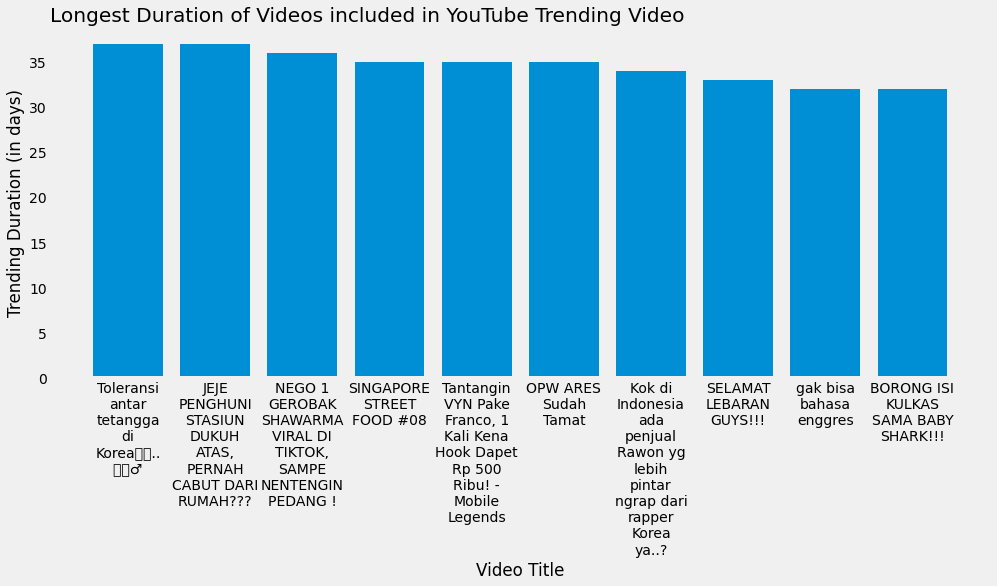

In [24]:
# Visualisasi data trending dengan chart bar
plt.figure(figsize=(15, 6))
plt.bar(
trending_duration.title[:10].apply(lambda title: "\n".join(wrap(title, width=10))),
trending_duration.trending_duration[:10]
)
plt.title("Longest Duration of Videos included in YouTube Trending Video", loc="left")
plt.xlabel("Video Title")
plt.ylabel("Trending Duration (in days)")
plt.grid(False)
plt.show()

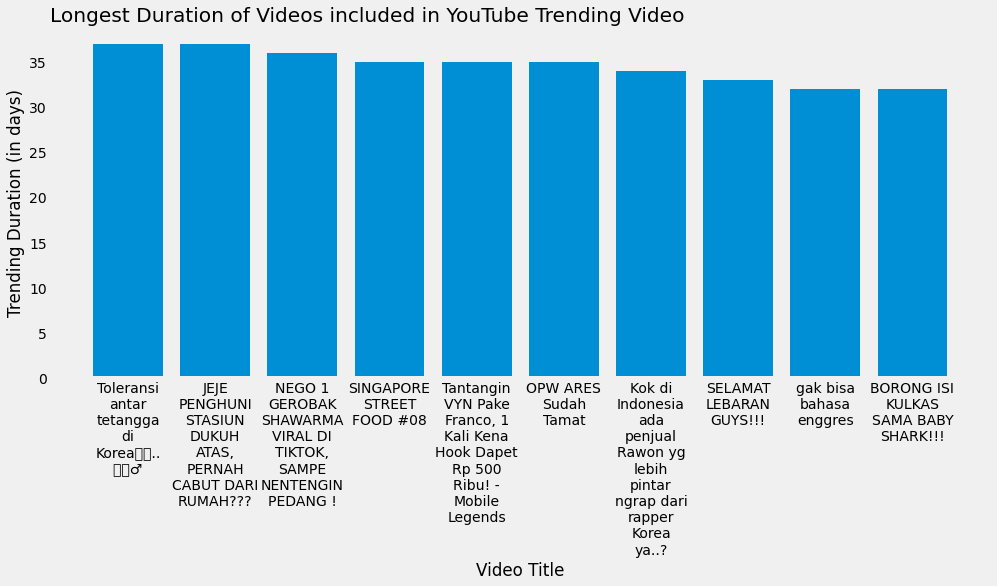

In [25]:
# Visualisasi data trending dengan chart bar
plt.figure(figsize=(15, 6))
plt.bar(
trending_duration.title[:10].apply(lambda title: "\n".join(wrap(title, width=10))),
trending_duration.trending_duration[:10]
)
plt.title("Longest Duration of Videos included in YouTube Trending Video", loc="left")
plt.xlabel("Video Title")
plt.ylabel("Trending Duration (in days)")
plt.grid(False)
plt.show()

# Most Viewed, Liked, and Disliked Video

In [26]:
trending_by_title = filtered_trending.groupby("title")
trending_rewind = trending_by_title[["view", "like", "dislike"]].agg(["min", "max", "mean", "sum"])
trending_rewind

view             \
                                                          min        max   
title                                                                      
"Awalnya Diserang Bertubi tubi" Lihatlah Bagaim...   101823.0   121044.0   
"BABY R" BIKIN GEMES !!! RAFATHAR CEMBURU, SEMU...  2280620.0  2637486.0   
"Emosi Rico Simanjutak" Saat Taisei Marukawa Be...    72434.0   116310.0   
"Grebek rumah harris vriza, dan percintaannya d...    68879.0   163773.0   
"Hellevator" Band Cover By Xdinary Heroes (원곡 :...   393043.0  1348612.0   
...                                                       ...        ...   
🥘Yuk! Kita coba in! Let’s eat | WayV’s ONE-DAY ...   148668.0   680210.0   
🥰 New Gadgets & Versatile Utensils For Home # 2...   330156.0  7334655.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...   278942.0  1212522.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...   320084.0  1097903.0   
🩸괴담회에 어서오세요🩸: 첫 번째 이야기 | WELCOME TO NCT’S HORRO...  1423178.0  2966798.0   

                                                                              \
                                                            mean         sum   
title                                                                          
"Awalnya Diserang Bertubi tubi" Lihatlah Bagaim...  1.114335e+05    222867.0   
"BABY R" BIKIN GEMES !!! RAFATHAR CEMBURU, SEMU...  2.459053e+06   4918106.0   
"Emosi Rico Simanjutak" Saat Taisei Marukawa Be...  9.390625e+04    375625.0   
"Grebek rumah harris vriza, dan percintaannya d...  1.267565e+05    760539.0   
"Hellevator" Band Cover By Xdinary Heroes (원곡 :...  1.126182e+06  14640369.0   
...                                                          ...         ...   
🥘Yuk! Kita coba in! Let’s eat | WayV’s ONE-DAY ...  5.519997e+05   8831995.0   
🥰 New Gadgets & Versatile Utensils For Home # 2...  3.414214e+06  34142143.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...  7.948737e+05   5564116.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...  7.562497e+05   4537498.0   
🩸괴담회에 어서오세요🩸: 첫 번째 이야기 | WELCOME TO NCT’S HORRO...  2.629831e+06  36817634.0   

                                                        like            \
                                                         min       max   
title                                                                    
"Awalnya Diserang Bertubi tubi" Lihatlah Bagaim...    1336.0    1456.0   
"BABY R" BIKIN GEMES !!! RAFATHAR CEMBURU, SEMU...   93348.0  101207.0   
"Emosi Rico Simanjutak" Saat Taisei Marukawa Be...     990.0    1432.0   
"Grebek rumah harris vriza, dan percintaannya d...    5529.0    8714.0   
"Hellevator" Band Cover By Xdinary Heroes (원곡 :...  127824.0  262846.0   
...                                                      ...       ...   
🥘Yuk! Kita coba in! Let’s eat | WayV’s ONE-DAY ...   39847.0  101922.0   
🥰 New Gadgets & Versatile Utensils For Home # 2...    2822.0   58066.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...    2790.0   10212.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...    3025.0    8759.0   
🩸괴담회에 어서오세요🩸: 첫 번째 이야기 | WELCOME TO NCT’S HORRO...  316849.0  457809.0   

                                                                              \
                                                             mean        sum   
title                                                                          
"Awalnya Diserang Bertubi tubi" Lihatlah Bagaim...    1396.000000     2792.0   
"BABY R" BIKIN GEMES !!! RAFATHAR CEMBURU, SEMU...   97277.500000   194555.0   
"Emosi Rico Simanjutak" Saat Taisei Marukawa Be...    1228.500000     4914.0   
"Grebek rumah harris vriza, dan percintaannya d...    7486.833333    44921.0   
"Hellevator" Band Cover By Xdinary Heroes (원곡 :...  237112.769231  3082466.0   
...                                                           ...        ...   
🥘Yuk! Kita coba in! Let’s eat | WayV’s ONE-DAY ...   87227.125000  1395634.0   
🥰 New Gadgets & Versatile Utensils

# Visualisasi

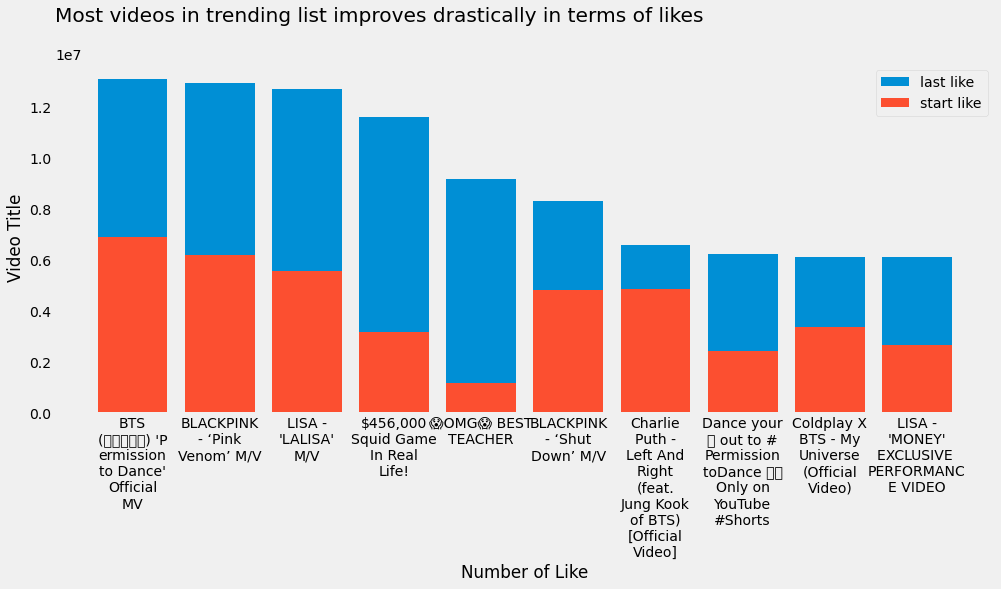

In [27]:
# Visualisasi Trending video teratas masing2 (like)
top_10_liked = trending_rewind["like"].sort_values("max", ascending=False).iloc[:10]
plt.figure(figsize=(15, 6))
plt.bar(
   top_10_liked.index.to_series().apply(lambda title: "\n".join(wrap(title, width=10))),
   top_10_liked["max"],
    label="last like"
)
plt.bar(
    top_10_liked.index.to_series().apply(lambda title: "\n".join(wrap(title, width=10))),
    top_10_liked["min"],
    label="start like"
)
plt.title("Most videos in trending list improves drastically in terms of likes", loc="left", y=1.1)
plt.xlabel("Number of Like")
plt.ylabel("Video Title")
plt.legend()
plt.grid(False)
plt.show()

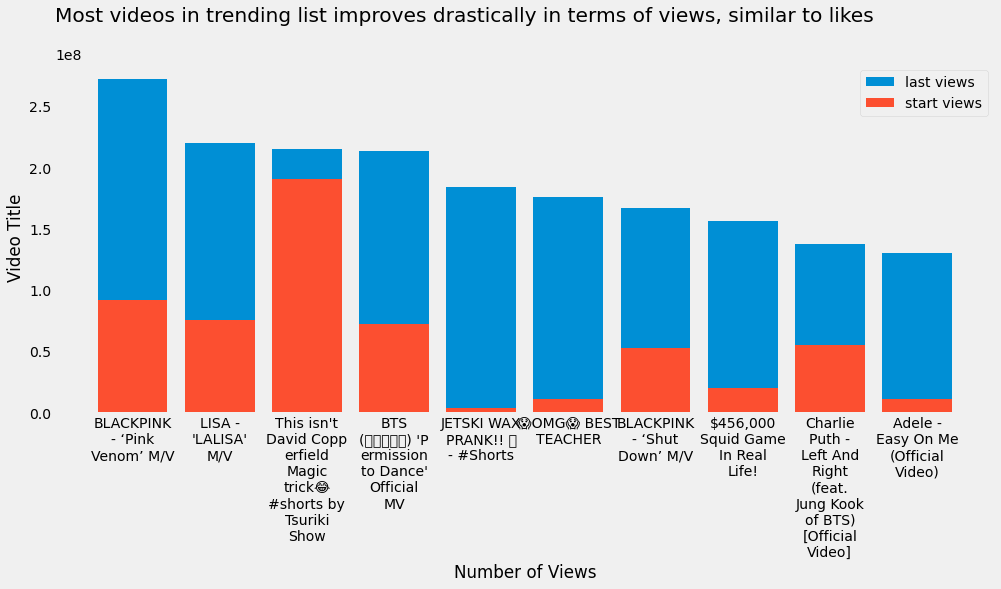

In [28]:
# Visualisasi Trending video teratas masing2 (view)
top_10_viewed = trending_rewind["view"].sort_values("max", ascending=False).iloc[:10]
plt.figure(figsize=(15, 6))
plt.bar(
    top_10_viewed.index.to_series().apply(lambda title: "\n".join(wrap(title, width=10))),
    top_10_viewed["max"],
    label="last views"
)
plt.bar(
    top_10_viewed.index.to_series().apply(lambda title: "\n".join(wrap(title, width=10))),
    top_10_viewed["min"],
    label="start views"
)
plt.title("Most videos in trending list improves drastically in terms of views, similar to likes", loc="left", y=1.1)
plt.xlabel("Number of Views")
plt.ylabel("Video Title")
plt.legend()
plt.grid(False)
plt.show()

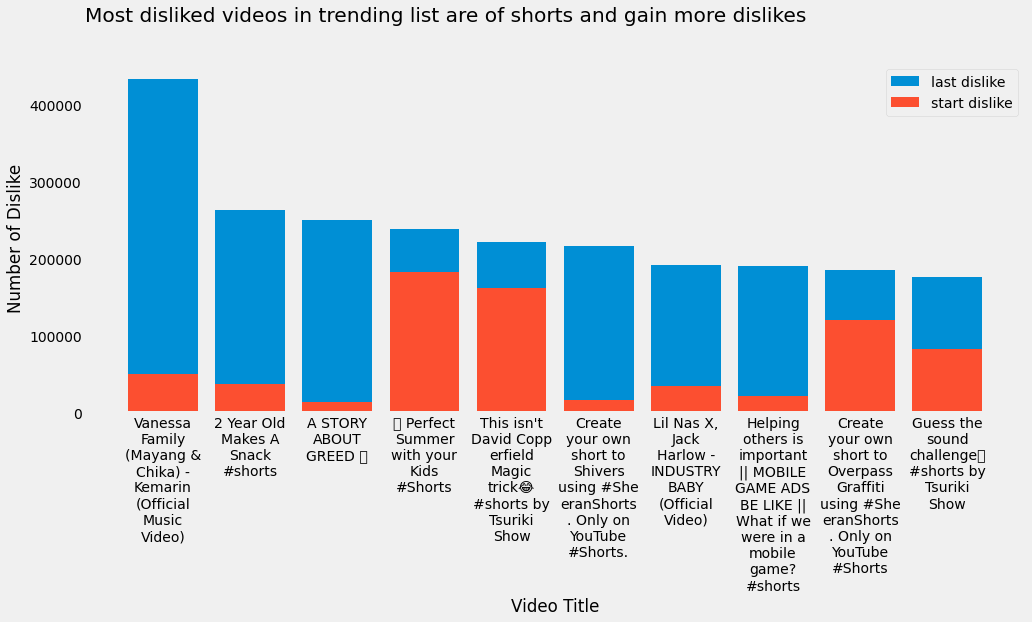

In [29]:
# Visualisasi Trending video teratas masing2 (dislike)
top_10_disliked = trending_rewind["dislike"].sort_values("max", ascending=False).iloc[:10]
plt.figure(figsize=(15, 6))
plt.bar(
    top_10_disliked.index.to_series().apply(lambda title: "\n".join(wrap(title, width=10))),
    top_10_disliked["max"],
    label="last dislike"
)
plt.bar(
    top_10_disliked.index.to_series().apply(lambda title: "\n".join(wrap(title, width=10))),
    top_10_disliked["min"],
    label="start dislike"
)
plt.title("Most disliked videos in trending list are of shorts and gain more dislikes", loc="left", y=1.1)
plt.ylabel("Number of Dislike")
plt.xlabel("Video Title")
plt.legend()
plt.grid(False)
plt.show()

#Attention

In [30]:
# sebagai contoh, perhatikan sampel judul dan deskripsi video berikut

sample = filtered_trending.sample(10, random_state=11)
sample[["title", "description"]]

,title,description
47938,"Fakta Baru Kecelakaan Vanessa Angel, Sopir Tak...",Pihak kepolisian telah melakukan olah TKP di l...
22890,Juicy Luicy x Un1ty - Lantas,Kali ini Juicy Luicy kedangatangan salah satu ...
37912,Saat Teduh Bersama - KETIKA YESUS TERTAWA—TIPS...,Hati yang gembira adalah obat!\n\n“KETIKA YESU...
42349,AWALNYA TEUKU RYAN GAK TAU RIA RICIS ARTIS?! #...,Hi Guys! Spesial di #BucketList kali ini kita ...
104384,NGINEP DI HOTEL 40 JUTA/MALAM! DIMANA-MANA EMAS 🤩,Social Media:\nhttps://www.youtube.com/jessica...
98600,Ochi Alvira Ft. Maulana Ardiansyah - Full Seny...,Official Music Video From Ochi Alvira Ft. Maul...
36289,Cho Jung-seok kisses Jeon Mi-do on a rainy nig...,"Once again, rain and coffee are playing cupid,..."
51748,:v,https://bit.ly/Trade_Bersama_OctaFX\n\nCuy! Ka...
57621,"RAVELIO DRAG QUEEN, GUE NORMAL DAN INI CUMA PE...",Drag Queen apa sih?? Ravelio ceritain apa itu ...
34498,VENEZUELA 1 x 3 ARGENTINA| MELHORES MOMENTOS |...,Argentina vence Venezuela com facilidade e man...


In [31]:
#membuat title dan description video menjadi lowercase

sample["title_lang"] = sample.title.apply(lambda title: langdetect.detect(title.lower()))
sample["desc_lang"] = sample.description.apply(lambda desc: langdetect.detect(desc.lower()))

In [32]:
with pd.option_context("display.max_colwidth", 100):
  display(sample[["title", "title_lang", "description", "desc_lang"]])

,title,title_lang,description,desc_lang
47938,"Fakta Baru Kecelakaan Vanessa Angel, Sopir Tak Injak Rem",id,Pihak kepolisian telah melakukan olah TKP di lokasi kejadian kecelakaan maut yang menewaskan Van...,id
22890,Juicy Luicy x Un1ty - Lantas,fr,"Kali ini Juicy Luicy kedangatangan salah satu boyband Indonesia yang pernah membuat cover lagu ""...",id
37912,Saat Teduh Bersama - KETIKA YESUS TERTAWA—TIPS BERGEMBIRA | 18 Sept 2021(Official Philip Mantofa),id,Hati yang gembira adalah obat!\n\n“KETIKA YESUS TERTAWA—TIPS BERGEMBIRA“\n.\n.\nWelcome Home! Se...,id
42349,AWALNYA TEUKU RYAN GAK TAU RIA RICIS ARTIS?! #BUCKETLIST,id,Hi Guys! Spesial di #BucketList kali ini kita kedatangan Ka Ria @Ricis Official dan ka Teuku Rya...,id
104384,NGINEP DI HOTEL 40 JUTA/MALAM! DIMANA-MANA EMAS 🤩,id,Social Media:\nhttps://www.youtube.com/jessicajane99\nhttps://www.instagram.com/jessicajane99\nh...,id
98600,Ochi Alvira Ft. Maulana Ardiansyah - Full Senyum Sayang ( Official Music Video ),en,"Official Music Video From Ochi Alvira Ft. Maulana Ardiansyah ""Full Senyum Sayang""\nSubscribe to ...",en
36289,Cho Jung-seok kisses Jeon Mi-do on a rainy night | Hospital Playlist Season 2 Ep 11 [ENG SUB],en,"Once again, rain and coffee are playing cupid, and it looks like this time they’ve finally succe...",en
51748,:v,sk,https://bit.ly/Trade_Bersama_OctaFX\n\nCuy! Kalian tau OctaFX? Platform trading ternyaman karena...,id
57621,"RAVELIO DRAG QUEEN, GUE NORMAL DAN INI CUMA PEKERJAAN - TALKPOD",id,Drag Queen apa sih?? Ravelio ceritain apa itu Drag Queen.\n\nTalkpod Setiap Hari Sabtu dan Mingg...,en
34498,VENEZUELA 1 x 3 ARGENTINA| MELHORES MOMENTOS | 9ª RODADA ELIMINATÓRIAS DA COPA | ge.globo,pt,Argentina vence Venezuela com facilidade e mantém vice-liderança nas eliminatórias. Lautaro Mart...,pt


In [33]:
# Pertama, kita akan buat fungsi yang akan mendeteksi bahasa dari sebuah teks sebagai berikut

def detect_language(text): 
  """Detect language of the `text`.""" 
  try:
    lang = langdetect.detect(text)
    return lang
  except:
    return

In [34]:
filtered_trending["title_lang"] = filtered_trending["title"].apply(detect_language)
filtered_trending["desc_lang"] = filtered_trending["description"].apply(detect_language)

In [35]:
filtered_trending[["title", "title_lang", "description", "desc_lang"]]

,title,title_lang,description,desc_lang
21322,NCT DREAM 엔시티 드림 'Hello Future' MV,it,"NCT DREAM's 1st Album Repackage ""Hello Future""...",en
21323,PART 3 // SUTRISNO DAN ENDANG BAHAGIA,de,Find me on sosial media :\n\nInstagram : https...,en
21324,This isn't David Copperfield Magic trick😂 #sho...,en,Thank you for watching.\nSubscribe to Tsuriki ...,en
21325,Rizky Billar - Pemimpinmu | Official Music Video,it,Rizky Billar - Pemimpinmu | Official Music Vid...,id
21326,Ini Pengakuan Pengemudi Pajero usai Rusak dan ...,id,Polisi menangkap pengemudi SUV yang merusak da...,id
...,...,...,...,...
120146,AleXa (알렉사) – 'Back In Vogue' Official MV,ca,Stream Back In Vogue:\n⇢ https://wmk.lnk.to/Gi...,en
120147,SELAMAT JALAN...KAMU UDAH GAK SAKIT LAGI 😭,de,#dehakimschannel\n\ntenang di alam baru kamu y...,id
120148,Tim Bradley vs Manny Pacquiao 1 | FREE FIGHT |...,en,We open up the vault to bring you this free fi...,en
120149,UCOK BABA INSPIRASI BESAR BUAT VINCENT DESTA -...,en,Talk show malam yang akan memberikan informasi...,id


In [36]:
indo_trending = filtered_trending.loc[
(filtered_trending.title_lang == "id") | (filtered_trending.desc_lang == "id")
]
with pd.option_context("display.max_columns", None):
  display(indo_trending.sample(10))

,video_id,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,live_status,local_title,local_description,duration,dimension,definition,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time,title_lang,desc_lang
106494,5scoCYjN56Q,2022-09-07 09:00:04+00:00,UCp7JIVbYW5cq86ifi68yDmQ,PEDAS EXTREME!! MAKAN MIE ABANG ADEK LEVEL 100...,Warmindo Abang Adek\nAlamat: Jl. Mandala Utara...,https://i.ytimg.com/vi/5scoCYjN56Q/hqdefault.jpg,480.0,360.0,Anak Kuliner,"['makan', 'makanan', 'kuliner', 'nusantara', '...",22,none,PEDAS EXTREME!! MAKAN MIE ABANG ADEK LEVEL 100...,Warmindo Abang Adek\nAlamat: Jl. Mandala Utara...,PT13M20S,2d,hd,False,True,NaN,NaN,651723.0,11703.0,NaN,0,414.0,2022-09-19 06:05:14.718241+00:00,en,id
101392,GazVIitSi9Q,2022-08-20 07:34:55+00:00,UC3LrM2hhKDGUn0-SC-QyT9Q,AKHIRNYA KAMI BELI RUMAH!! (#AycelCariRumah Ep...,"Assalamualaikum, hi guys how are you? 🙋💕\n\n🌸L...",https://i.ytimg.com/vi/GazVIitSi9Q/hqdefault.jpg,480.0,360.0,isti ve musab,"['#mixmarriage', '#LDR', '#indoturki', 'isti',...",22,none,AKHIRNYA KAMI BELI RUMAH!! (#AycelCariRumah Ep...,"Assalamualaikum, hi guys how are you? 🙋💕\n\n🌸L...",PT12M25S,2d,hd,False,True,NaN,NaN,255333.0,7731.0,NaN,0,279.0,2022-08-25 06:01:30.805817+00:00,id,en
116972,hTN7cjkGfSc,2022-11-10 13:00:34+00:00,UCzTsWuCdVP_vehWyGwPcS3Q,Roy Ketakutan Disamperin Didu Sama Ibing - PRE...,Didu sama Ibing melihat Roy ada ditempat keber...,https://i.ytimg.com/vi/hTN7cjkGfSc/hqdefault.jpg,480.0,360.0,RCTI - LAYAR DRAMA INDONESIA,"['Sinetron', 'Sinetron RCTI', 'Full Episode', ...",24,none,Roy Ketakutan Disamperin Didu Sama Ibing - PRE...,Didu sama Ibing melihat Roy ada ditempat keber...,PT10M50S,2d,hd,False,False,NaN,NaN,408442.0,4815.0,NaN,0,230.0,2022-11-11 06:01:07.865581+00:00,id,id
100632,JH3OCcBUKv8,2022-08-14 02:45:12+00:00,UCUvPGTI0_M0jgxjWKG8K5Hg,Lomba Agustusan 2022 Lucu - Manusia VS Hantu -...,Dalam memperingati hari Kemerdekaan Republik I...,https://i.ytimg.com/vi/JH3OCcBUKv8/hqdefault.jpg,480.0,360.0,Warganet Life Official,"['Warganet Life', 'Warganet', 'Netizen', 'anim...",1,none,Lomba Agustusan 2022 Lucu - Manusia VS Hantu -...,Dalam memperingati hari Kemerdekaan Republik I...,PT23M6S,2d,hd,False,True,NaN,NaN,832813.0,22339.0,NaN,0,1003.0,2022-08-21 06:01:55.559405+00:00,id,id
26931,NaN,2021-07-26 10:55:24+00:00,UCB1fvlA5xmLJ0tZblpoTuaQ,China Kembali Kena Bencana Mengerikan! Badai P...,VIVA - Badai pasir setinggi 100 meter kacauka...,NaN,NaN,NaN,VIVA.CO.ID,"['viva', 'newstainment', 'news', 'berita', 'vi...",25,none,China Kembali Kena Bencana Mengerikan! Badai P...,VIVA - Badai pasir setinggi 100 meter kacauka...,PT1M34S,2d,hd,False,True,NaN,NaN,2611727.0,22695.0,1098.0,0,13799.0,2021-07-29 06:00:56.663229+00:00,id,id
34020,NaN,2021-08-28 08:32:32+00:00,UCq9VjkTSRBvlyr0sSXwm8Kw,PERSIB vs PERSIB U-20 | Latihan Bersama,Latihan bersama antara PERSIB dengan PERSIB U-...,NaN,NaN,NaN,PERSIB,"['persib official', 'maung bandung', 'football...",17,none,PERSIB vs PERSIB U-20 | Latihan Bersama,Latihan bersama antara PERSIB dengan PERSIB U-...,PT2H6M42S,2d,hd,False,False,NaN,NaN,366641.0,9616.0,207.0,0,387.0,2021-09-02 06:01:41.212561+00:00,id,id
34760,NaN,2021-08-31 12:43:50+00:00,UCPAxpUn1mrn14xU0JpsLhDg,"KPK Tangkap Puput Tantriana, Bupati Probolingg...",Bupati Probolinggo Puput Tantriana dan suaminy...,NaN,NaN,NaN,Kompas.com,"['kompas.com', 'kompascom', 'bupati probolingg...",22,none,"KPK Tangkap Puput Tantriana, Bupati Probolingg...",Bupati Probolinggo Puput Tantriana dan suaminy...,PT3M11S,2d,hd,False,True,NaN,NaN,611786.0,3169.0,326.0,0,3087.0,2021-09-06 06:00:58.167408+00:00,id,id
35948,NaN,2021-09-09 08:00:15+00:00,UCxb2XwbJ0W5NUecmJIEHNxg,GuyonWaton Official - Kelangan (Official Music...,K E L A N G A N\n\nStay on instagram @guyonwat...,NaN,NaN,NaN,GUYONWATON OFFICIAL,"['kelangan', 'guyon waton', 'guyonwaton', 'nda...",10,none,GuyonWaton Official - Kelangan (Official Musi

# Feature Extraction

In [37]:
data = indo_trending[["title", "description", "category_id"]].reset_index(drop=True)
data

,title,description,category_id
0,Rizky Billar - Pemimpinmu | Official Music Video,Rizky Billar - Pemimpinmu | Official Music Vid...,10
1,Ini Pengakuan Pengemudi Pajero usai Rusak dan ...,Polisi menangkap pengemudi SUV yang merusak da...,25
2,Aksi Demo Tolak Kedatangan Jokowi di Kendari B...,Tanggal Tayang: 30/06/2021\n\nProgram berita h...,25
3,"PERTAMA KALI LIAT SAPI SEGEDE GINI, DINAIKIN D...",Assalamualaikum gaeess..! sudah nonton video s...,15
4,PODKESMAS SAMPAI GA NYAMAN DIBAHAS DISINI - To...,Talk show malam yang akan memberikan informasi...,24
...,...,...,...
38891,AKU SPEEDRUN KEHIDUPAN DARI UMUR 0 SAMPAI 12 T...,Hai kawan!\nHari ini aku bakal main game diman...,20
38892,DENNY CAKNAN FEAT HAPPY ASMARA - MENDEM WEDOKA...,#DCMUSIK #DCPRODUCTION #HAPPYASMARA\n\nTitle: ...,10
38893,Ngetes mobil listrik Toyota bZ4X,Video Innova ZENIX Hybrid : https://youtu.be/P...,2
38894,SELAMAT JALAN...KAMU UDAH GAK SAKIT LAGI 😭,#dehakimschannel\n\ntenang di alam baru kamu y...,15


# Duplicates

In [38]:
data.drop_duplicates(subset="title", inplace=True)

In [39]:
data.reset_index(drop=True, inplace=True)
data.shape

(6303, 3)

# Feature Engineering

In [40]:
# list_emoji = [e for e in emoji.distinct_emoji_list(test)]
# from emoji import UNICODE_EMOJI
emojis = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
emojis

# list_emoji = [e for e in emoji.EMOJI_DATA]
# list_emoji
count = 0
for em in emojis:
    for title in data.title:
        if em in title:
            count += 1

print ("how many titles use emoji?", count)

how many titles use emoji? 819


In [41]:
def demojize(text): 
  for em in emojis: 
    if em in text: 
      em_text = emoji.demojize(em) 
      text = text.replace(em, " " + em_text + " ") 
  return text

In [42]:
data["title_emoji"] = data.title.apply(demojize)

In [43]:
title_with_emoji_idx = [ 
    idx for idx in range(len(data.title)) 
    for em in emojis 
    if em in data.loc[idx, "title"]
]

In [44]:
with pd.option_context("display.max_colwidth", 100): 
  display(data.loc[title_with_emoji_idx])

,title,description,category_id,title_emoji
33,Dari Jendela Smp : GREGETTT...Wih kelihatannya Wulan jadi primadona di SMA Merdeka Mandiri nih...❤,Saksikan #DariJendelaSMP Setiap Hari Pkl. 16.40 WIB hanya di @Surya Citra Televisi (SCTV) \n@sin...,24,Dari Jendela Smp : GREGETTT...Wih kelihatannya Wulan jadi primadona di SMA Merdeka Mandiri nih.....
78,BIKIN CEWEK TERPESONA 😍 Aksi Heroik Driver Muda Menolong Sopir Yang Kesulitan di Sitinjau Lauik,Aksi heroik driver muda membantu sopir minibus yang kesulitan di Sitinjau Lauik\n\ninstagram : h...,2,BIKIN CEWEK TERPESONA :smiling_face_with_heart-eyes: Aksi Heroik Driver Muda Menolong Sopir Ya...
80,15 MENIT MEMBAKAR LEMAK 1 Kg !!! 24 Jam TIMBANGAN TURUN ✅ ✅ ✅,"15 menit membakar lemak, ok ! siapa yg workout mengharapkan bisa membakar 1 kg lemak dalam 15 me...",26,15 MENIT MEMBAKAR LEMAK 1 Kg !!! 24 Jam TIMBANGAN TURUN :check_mark_button: :check_mark_butto...
148,"WHY‼️ SAYA DISOMASI, TOLOOONG...- Deddy Corbuzier Podcast","#somasi #odgj #podcast\nTEMAN TEMAN KONTEN CREATOR, JANGAN TAKUT BERKARYA SELAMA TUJUAN KALIAN B...",24,"WHY :double_exclamation_mark: SAYA DISOMASI, TOLOOONG...- Deddy Corbuzier Podcast"
148,"WHY‼️ SAYA DISOMASI, TOLOOONG...- Deddy Corbuzier Podcast","#somasi #odgj #podcast\nTEMAN TEMAN KONTEN CREATOR, JANGAN TAKUT BERKARYA SELAMA TUJUAN KALIAN B...",24,"WHY :double_exclamation_mark: SAYA DISOMASI, TOLOOONG...- Deddy Corbuzier Podcast"
...,...,...,...,...
6277,KITA MENCARI CARA UNTUK KEMBALI PULANG ‼️ Romantic Raft [#2],- Subcribe Gratis : https://goo.gl/9DnNkc\n- Join TeguhTeam : https://www.youtube.com/channel/U...,20,KITA MENCARI CARA UNTUK KEMBALI PULANG :double_exclamation_mark: Romantic Raft [#2]
6285,Emak Korea terharu banget karena dikasih masakan 'Mewah banget'...!😅,#인도네시아음식#streetfood#pecellele \nMukbang PECEL LELE ala Jisun!!!!!!!!\n\n\n\n\n\n🎵Music provided ...,24,Emak Korea terharu banget karena dikasih masakan 'Mewah banget'...! :grinning_face_with_sweat:
6298,GA PULANG KALAU GA MENANG‼️,- Subcribe Gratis : https://goo.gl/9DnNkc\n- Join TeguhTeam : https://www.youtube.com/channel/U...,20,GA PULANG KALAU GA MENANG :double_exclamation_mark:
6298,GA PULANG KALAU GA MENANG‼️,- Subcribe Gratis : https://goo.gl/9DnNkc\n- Join TeguhTeam : https://www.youtube.com/channel/U...,20,GA PULANG KALAU GA MENANG :double_exclamation_mark:


In [45]:
# Delete kolom title

data.drop(columns="title", inplace=True)

# Eksplorasi

In [46]:
desc_with_emoji_idx = [
    idx for idx in range(len(data.description)) 
    for em in emojis 
    if em in data.loc[idx, "description"]
]

data["desc_emoji"] = data.description.apply(demojize)

with pd.option_context("display.max_colwidth", 100): 
  display(data.loc[desc_with_emoji_idx])

,description,category_id,title_emoji,desc_emoji
0,Rizky Billar - Pemimpinmu | Official Music Video\n\nSurprise Untuk Dede Lesti :\nhttps://youtu.b...,10,Rizky Billar - Pemimpinmu | Official Music Video,Rizky Billar - Pemimpinmu | Official Music Video\n\nSurprise Untuk Dede Lesti :\nhttps://youtu.b...
10,"Title: Sempurnakan Hariku \nArtist: Rey Mbayang\nComposser: Rey Mbayang, Trakast\nMusic Arranger...",10,Rey Mbayang - Sempurnakan Hariku (Official Music Video),"Title: Sempurnakan Hariku \nArtist: Rey Mbayang\nComposser: Rey Mbayang, Trakast\nMusic Arranger..."
11,Title: Apa Kabar Mantan\nArtist: Yeni Inka\nSongwriter: Yonanda NDX\n\nFollow juga kita disini y...,10,Yeni Inka - Apa Kabar Mantan (Official Music Video ANEKA SAFARI) | JOOX ORIGINAL,Title: Apa Kabar Mantan\nArtist: Yeni Inka\nSongwriter: Yonanda NDX\n\nFollow juga kita disini y...
11,Title: Apa Kabar Mantan\nArtist: Yeni Inka\nSongwriter: Yonanda NDX\n\nFollow juga kita disini y...,10,Yeni Inka - Apa Kabar Mantan (Official Music Video ANEKA SAFARI) | JOOX ORIGINAL,Title: Apa Kabar Mantan\nArtist: Yeni Inka\nSongwriter: Yonanda NDX\n\nFollow juga kita disini y...
13,#ByoodeJanganCobaCoba #Byoode #MusicVideo #Girlband #Dangdut\n\nDengerin lagu Byoode - Jangan Co...,10,Byoode - Jangan Coba Coba | Official Music Video,#ByoodeJanganCobaCoba #Byoode #MusicVideo #Girlband #Dangdut\n\nDengerin lagu Byoode - Jangan Co...
...,...,...,...,...
6296,▶ Top up semua voucher Game Teraman Terpercaya dan Termurah!!\nVia Website TOP UP DIAMOND Ku : h...,20,Di Saat SEMUA PRO PLAYER NGETROLL Gw!! PUSING KEPALA SUMPAH!! - Mobile Legends,:play_button: Top up semua voucher Game Teraman Terpercaya dan Termurah!!\nVia Website TOP UP ...
6296,▶ Top up semua voucher Game Teraman Terpercaya dan Termurah!!\nVia Website TOP UP DIAMOND Ku : h...,20,Di Saat SEMUA PRO PLAYER NGETROLL Gw!! PUSING KEPALA SUMPAH!! - Mobile Legends,:play_button: Top up semua voucher Game Teraman Terpercaya dan Termurah!!\nVia Website TOP UP ...
6296,▶ Top up semua voucher Game Teraman Terpercaya dan Termurah!!\nVia Website TOP UP DIAMOND Ku : h...,20,Di Saat SEMUA PRO PLAYER NGETROLL Gw!! PUSING KEPALA SUMPAH!! - Mobile Legends,:play_button: Top up semua voucher Game Teraman Terpercaya dan Termurah!!\nVia Website TOP UP ...
6296,▶ Top up semua voucher Game Teraman Terpercaya dan Termurah!!\nVia Website TOP UP DIAMOND Ku : h...,20,Di Saat SEMUA PRO PLAYER NGETROLL Gw!! PUSING KEPALA SUMPAH!! - Mobile Legends,:play_button: Top up semua voucher Game Teraman Terpercaya dan Termurah!!\nVia Website TOP UP ...


In [47]:
data.drop(columns="description", inplace=True)

In [48]:
# Menggabungkan title_emoji dengan desc_emoji ke dalam all text

data["all_text"] = data["title_emoji"] + " " + data["desc_emoji"]

# Text Processing

In [49]:
# data split
X_train, X_dev, y_train, y_dev = train_test_split(
    data["all_text"], data["category_id"], 
    test_size=.2, 
    stratify=data["category_id"], 
    random_state=11
)
training_size = X_train.shape[0]
dev_size = X_dev.shape[0]

print("training_size = ",training_size) 
print("dev_size = ", dev_size)

# define vectorizer
vectorizer = TfidfVectorizer(
    min_df=.015,
    max_df=.7,
    ngram_range=(1, 1),
)

# generate tf-idf matrix
train_tfidf = vectorizer.fit_transform(X_train)
dev_tfidf = vectorizer.transform(X_dev)
print("Got train tf-idf with shape:", train_tfidf.shape)
print("Got dev tf-idf with shape:", dev_tfidf.shape)

# convert to dataframe
train_tfidf = pd.DataFrame(train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
dev_tfidf = pd.DataFrame(dev_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

training_size =  5042
dev_size =  1261
Got train tf-idf with shape: (5042, 923)
Got dev tf-idf with shape: (1261, 923)


In [50]:
with pd.option_context("display.max_columns", 100):
  display(train_tfidf.sample(5))

,00,000,01,03,04,07,08,09,10,11,12,13,14,15,16,17,18,19,1dvz1au,1gxqz9s,1st,20,2020,2021,2022,21,22,23,24,26,28,2oukyag,2yfofxp,30,31,3ws0f48,40,45,62,about,academy,acara,ada,adalah,admin,agar,agustus,ahmad,air,aja,...,untuk,untukmu,up,update,updates,us,user,utm_campaign,utm_medium,utm_source,v7,vallen,via,video,videonya,videos,vidio,viral,voc,vocal,vs,vt,wa,waktu,warga,watch,watching,web,website,wes,whatsapp,wib,with,withyoutube,wong,world,www,ya,yaa,yah,yaitu,yang,yen,yeni,yg,you,your,youtu,youtube,yuk
1116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.126055,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067837,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.165507,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155107,0.0,0.000000,0.0,0.0,0.052129,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.309351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.165444,0.000000,...,0.070982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.225399,0.0,0.0,0.0,0.150056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.281347,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.097744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.159159,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052266,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.112963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087417,0.0,0.083166,0.0,0.0,0.029379,0.0,0.0,0.0,0.0,0.0,0.0,0.034519,0.0
2333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.232282,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# Model Training & Evaluation

In [57]:
dict_models = {
    "logistic_regression": LogisticRegression(),
    "naive_bayes": MultinomialNB(),
    "svm": LinearSVC(random_state=11),
    "decision_tree": DecisionTreeClassifier(random_state=11),
    "random_forest": RandomForestClassifier(random_state=11)
}

In [58]:
for model in dict_models.values():
  print(f"-- {model.__class__.__name__} --")
  model.fit(train_tfidf, y_train)
  y_pred = model.predict(dev_tfidf)
  print("Reports on dev set:", classification_report(y_dev, y_pred), sep="\n")

-- LogisticRegression --
Reports on dev set:
              precision    recall  f1-score   support

           1       0.92      0.59      0.72        39
           2       0.96      0.72      0.83        36
          10       0.88      0.95      0.91       243
          15       1.00      0.36      0.53        11
          17       0.93      0.81      0.87        48
          19       1.00      0.29      0.44         7
          20       0.93      0.82      0.87       115
          22       0.76      0.64      0.70       120
          23       0.89      0.57      0.69        44
          24       0.76      0.90      0.82       418
          25       0.80      0.93      0.86       123
          26       0.75      0.32      0.44        19
          27       1.00      0.27      0.43        11
          28       1.00      0.47      0.64        15
          29       1.00      1.00      1.00        12

    accuracy                           0.82      1261
   macro avg       0.91      0.64  

# LinearSVC

In [59]:
svm_grid_search = GridSearchCV(
    dict_models["svm"],
    {"C": (10, 1, .1, .05, .01)},
)

svm_grid_search.fit(train_tfidf, y_train)
svm_pred_dev = svm_grid_search.predict(dev_tfidf)
print("Reports on train set:",
      classification_report(
          y_train,
          svm_grid_search.predict(train_tfidf)
          ), sep="\n")
print("Reports on dev set:", classification_report(y_dev, svm_pred_dev), sep="\n")

Reports on train set:
              precision    recall  f1-score   support

           1       0.98      0.95      0.96       158
           2       0.99      1.00      1.00       144
          10       0.96      0.99      0.97       972
          15       1.00      1.00      1.00        44
          17       0.93      0.98      0.95       194
          19       1.00      0.89      0.94        27
          20       0.96      0.97      0.96       462
          22       0.96      0.89      0.92       481
          23       0.96      0.93      0.94       174
          24       0.95      0.95      0.95      1670
          25       0.95      0.99      0.97       492
          26       0.92      0.91      0.91        74
          27       0.98      0.93      0.95        43
          28       1.00      1.00      1.00        61
          29       1.00      0.98      0.99        46

    accuracy                           0.96      5042
   macro avg       0.97      0.96      0.96      5042
weig

In [60]:
svm_grid_search.best_params_

{'C': 1}

# RandomForestClassifier

In [61]:
random_forest_grid_search = GridSearchCV(
    dict_models["random_forest"],
    {
        "n_estimators": (10, 20, 25, 50, 75, 100, 125), 
     "max_depth": (5, 10, 25, 50),
     }
)

random_forest_grid_search.fit(train_tfidf, y_train)
random_forest_pred = random_forest_grid_search.predict(dev_tfidf)
print("Reports on train set:", 
      classification_report(
          y_train,
          random_forest_grid_search.predict(train_tfidf)
        ),
      sep="\n"
)
print("Reports on dev set:", classification_report(y_dev, random_forest_pred), sep="\n")

Reports on train set:
              precision    recall  f1-score   support

           1       1.00      0.97      0.99       158
           2       1.00      0.97      0.99       144
          10       1.00      1.00      1.00       972
          15       1.00      0.95      0.98        44
          17       0.98      0.98      0.98       194
          19       1.00      0.85      0.92        27
          20       1.00      1.00      1.00       462
          22       1.00      0.99      0.99       481
          23       1.00      0.96      0.98       174
          24       0.97      1.00      0.98      1670
          25       1.00      1.00      1.00       492
          26       1.00      0.88      0.94        74
          27       1.00      0.95      0.98        43
          28       1.00      1.00      1.00        61
          29       1.00      1.00      1.00        46

    accuracy                           0.99      5042
   macro avg       1.00      0.97      0.98      5042
weig

In [ ]:
random_forest_grid_search.best_params_

{'max_depth': 50, 'n_estimators': 125}

# Save Model

In [62]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer(
        min_df=.015,
        max_df=.7,
        ngram_range=(1, 1),
        )),
        ("model", RandomForestClassifier(
            max_depth=50,
            n_estimators=75,
            random_state=11
            ))
])

# training
model.fit(X_train, y_train)

pred = model.predict(X_dev)
print("Reports on train set:",
      classification_report(
          y_train,
          model.predict(X_train)
          ),
      sep="\n"
)
print("Reports on dev set:", classification_report(y_dev, pred), sep="\n")

Reports on train set:
              precision    recall  f1-score   support

           1       1.00      0.97      0.99       158
           2       1.00      0.97      0.99       144
          10       1.00      1.00      1.00       972
          15       1.00      0.95      0.98        44
          17       0.98      0.98      0.98       194
          19       1.00      0.85      0.92        27
          20       1.00      1.00      1.00       462
          22       1.00      0.99      0.99       481
          23       1.00      0.97      0.98       174
          24       0.97      1.00      0.98      1670
          25       1.00      1.00      1.00       492
          26       1.00      0.88      0.94        74
          27       1.00      0.95      0.98        43
          28       1.00      1.00      1.00        61
          29       1.00      1.00      1.00        46

    accuracy                           0.99      5042
   macro avg       1.00      0.97      0.98      5042
weig

In [63]:
joblib.dump(model, 'D:\Data Expert\modelyt.gz')

['D:\\Data Expert\\modelyt.gz']

In [64]:
model = joblib.load('D:\Data Expert\modelyt.gz')
print(model.get_params())

{'memory': None, 'steps': [('vectorizer', TfidfVectorizer(max_df=0.7, min_df=0.015)), ('model', RandomForestClassifier(max_depth=50, n_estimators=75, random_state=11))], 'verbose': False, 'vectorizer': TfidfVectorizer(max_df=0.7, min_df=0.015), 'model': RandomForestClassifier(max_depth=50, n_estimators=75, random_state=11), 'vectorizer__analyzer': 'word', 'vectorizer__binary': False, 'vectorizer__decode_error': 'strict', 'vectorizer__dtype': <class 'numpy.float64'>, 'vectorizer__encoding': 'utf-8', 'vectorizer__input': 'content', 'vectorizer__lowercase': True, 'vectorizer__max_df': 0.7, 'vectorizer__max_features': None, 'vectorizer__min_df': 0.015, 'vectorizer__ngram_range': (1, 1), 'vectorizer__norm': 'l2', 'vectorizer__preprocessor': None, 'vectorizer__smooth_idf': True, 'vectorizer__stop_words': None, 'vectorizer__strip_accents': None, 'vectorizer__sublinear_tf': False, 'vectorizer__token_pattern': '(?u)\\b\\w\\w+\\b', 'vectorizer__tokenizer': None, 'vectorizer__use_idf': True, 'vec

In [65]:
preds = model.predict(X_dev)
print(classification_report(y_dev, preds))

              precision    recall  f1-score   support

           1       1.00      0.69      0.82        39
           2       0.97      0.78      0.86        36
          10       0.92      0.95      0.94       243
          15       1.00      0.64      0.78        11
          17       0.95      0.81      0.88        48
          19       1.00      0.57      0.73         7
          20       0.95      0.92      0.93       115
          22       0.95      0.73      0.83       120
          23       1.00      0.77      0.87        44
          24       0.81      0.93      0.87       418
          25       0.83      0.95      0.89       123
          26       0.87      0.68      0.76        19
          27       1.00      0.55      0.71        11
          28       1.00      0.47      0.64        15
          29       1.00      1.00      1.00        12

    accuracy                           0.88      1261
   macro avg       0.95      0.76      0.83      1261
weighted avg       0.89   